<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/03_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification With TensorFlow

Types of Classification
1. Binary
2. Multiclass
3. Multilabel


In [1]:
# Standard imports
from typing import List, Tuple, Dict, Optional, Union
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

### Create Data For Classification

* Using scikit-learn

In [2]:
from sklearn.datasets import make_circles

RANDOM_STATE = 1
SEED = 2
NOISE = 0.05
N_SAMPLES = 2_000

X, y = make_circles(N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE)

X.shape, y. shape

((2000, 2), (2000,))

In [3]:
# Preview the data
X[:4], y[:4]

(array([[-0.54830966, -0.90374793],
        [-0.287522  , -0.70272049],
        [-0.19083057,  0.83641477],
        [-0.29472923,  0.72388715]]), array([0, 1, 1, 1]))

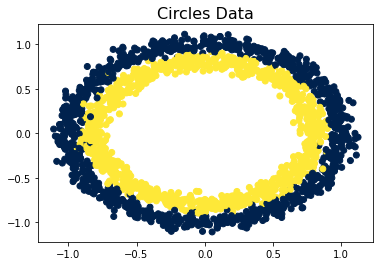

In [4]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title("Circles Data", size=16)
plt.show()

### Build A Classification Model (NN)

* using a single layer with 10 neurons.
* classification loss = **binary_crossentropy**
* classification metrics = **accuracy**
* Epochs = 50

In [5]:
# Build a model
tf.random.set_seed(SEED)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[X.shape[-1]])
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 4.2667 - accuracy: 0.1505
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 4.0055 - accuracy: 0.1455
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 3.5534 - accuracy: 0.1570
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 3.3840 - accuracy: 0.1570
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 3.3012 - accuracy: 0.1625
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 3.2341 - accuracy: 0.1555
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 3.1191 - accuracy: 0.1525
Epoch 8/50
63/63 [==============================] - 0s 7ms/step - loss: 3.0091 - accuracy: 0.1430
Epoch 9/50
63/63 [==============================] - 0s 8ms/step - loss: 2.9061 - accuracy: 0.1540
Epoch 10/50
63/63 [==============================] - 0s 7ms/step - loss: 2.8053 - accuracy: 0.1650
Epoch 11/50
63/63 [

In [6]:
# Evaluate
model_1.evaluate(X, y)

63/63 [==============================] - 1s 5ms/step - loss: 1.5096 - accuracy: 0.2070


[1.5095537900924683, 0.2070000022649765]

### Comment

* The model's performance is very poor!
* What might be the cause of the poor performance??
* Maybe I should add an extra layer 🤔

In [7]:
# Build
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X.shape[-1]]),
    tf.keras.layers.Dense(units=1)
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 
model_2.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 3s 6ms/step - loss: 1.9186 - accuracy: 0.4580
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4795
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4775
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4960
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4630
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5170
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4930
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4800
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4530
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5160
Epoch 11/50
63/63 [

### Comment:

* The model still has a very poor performance!
* Let's visualize the model's predictions.

In [8]:
def plot_decision_boundary(model, X:np.ndarray, y:np.ndarray) -> "Plot":
  """ This is used to plots the decision boundary created by a model 
  predicting on X. This function has been adapted from two phenomenal 
  resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. (Made with ML basics - https://github.com/GokuMohandas/MadeWithML/"
  "blob/main/notebooks/08_Neural_Networks.ipynb")
  """
  # Define the axis boundaries of the plot and create a meshgrid
  # The numpy.meshgrid function is used to create a rectangular grid out of two 
  # given one-dimensional arrays representing the Cartesian indexing or Matrix 
  # indexing. Meshgrid function is somewhat inspired from MATLAB.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


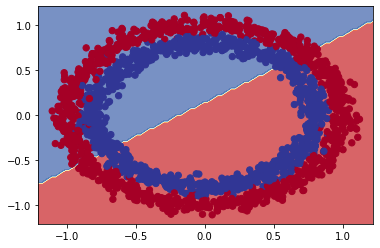

In [9]:
plot_decision_boundary(model_2, X, y)

### Improve The Model

* Add **non-linear** `activation` functions.


### You can checkout [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.98779&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [10]:
# Build
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer_1 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit
history_3 = model_3.fit(X, y, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5040
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5360
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5380
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5555
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5500
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6150
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5680
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.5950
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.5650
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6135
Epoch 11/

In [12]:
# Evaluate
model_3.evaluate(X, y)

63/63 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9765


[0.09229619801044464, 0.9764999747276306]

### Split The Data

* Split it into training and validation sets.

In [13]:
RATIO = 1_600
X_train, y_train = X[:RATIO], y[:RATIO]
X_val, y_val = X[RATIO:], y[RATIO:]

X_train.shape, X_val.shape 

((1600, 2), (400, 2))

In [14]:
# Rebuild model_3
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", 
                          name="output_layer") # units=1 (since the output is binary)
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer (Dense)        (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit
history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5125
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5375
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5831
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5788
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5956
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5950
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6244
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6162
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5656
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5987
Epoch 11/

In [16]:
# Evaluate
model_3.evaluate(X_val, y_val)

13/13 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.9625


[0.135078564286232, 0.9624999761581421]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


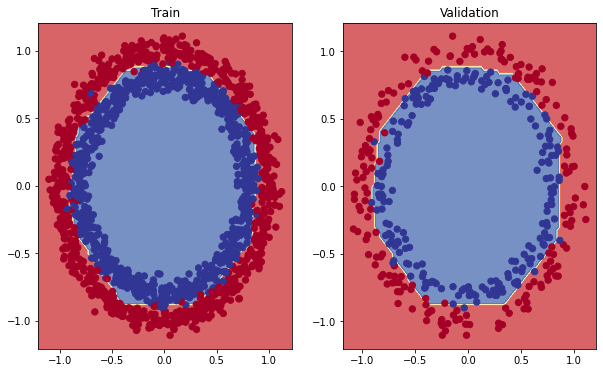

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_val, y_val)
plt.title("Validation")

plt.show()

### Implement Some Activation Functions

1. Linear function. 

$$linear(x) = x $$

2. Sigmoid function.

$$\sigma(x) = \frac{1}{1 + e^{(-x)}} $$

3. ReLU (Rectified Linear Unit) function.

$$relu(x) = max{(0, x)}$$

4. Tanh function. 

$$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})} $$

In [18]:
def linear_function(X: np.ndarray) -> np.ndarray:
  """This applies a linear function to the input array.
  i.e it returns an unmodified input."""
  return X


def sigmoid_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  It returns values between 0 and 1.
  """
  return np.divide(1, (1 + np.exp(-X)))


def ReLU_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  i.e it returns values between 0 and the max. positive number.
  """
  return np.array([max(0, x_) for x_ in X])


def tanh_activation(X: np.ndarray) -> np.ndarray:
  """This applies the tanh activation function to the input array.
  """
  numerator = (np.exp(X) - np.exp(-X))
  denominator = (np.exp(X) + np.exp(-X))
  return np.divide(numerator, denominator)

def linear_plot(X: np.ndarray, title: str="") -> "Plot":
  """This returns the linear plot."""
  plt.plot(X)
  plt.title(f"{title}", size=15)
  plt.show()

In [19]:
A = np.arange(-10, 10)

A

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

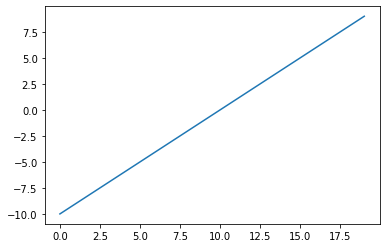

In [20]:
linear_plot(A)

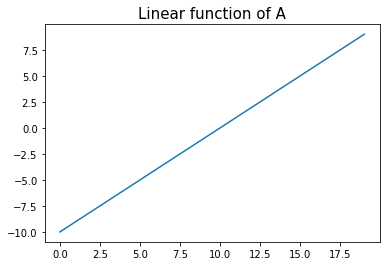

In [21]:
linear_plot(linear_function(A), title="Linear function of A")

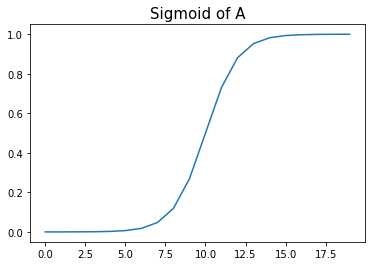

In [22]:
sigmoid_A = sigmoid_activation(A)
linear_plot(sigmoid_A, title="Sigmoid of A")

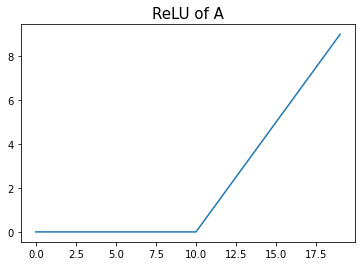

In [23]:
relu_A = ReLU_activation(A)
linear_plot(relu_A, title="ReLU of A")

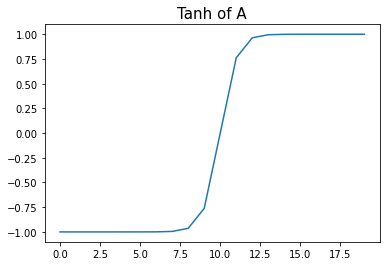

In [24]:
tanh_A = tanh_activation(A)
linear_plot(tanh_A, title="Tanh of A")

### Build Another Model With A Higher Learning Rate

* e.g. learning_rate=0.01

In [25]:
# Build
tf.random.set_seed(SEED)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit
history_4 = model_4.fit(X_train, y_train, epochs=70)



Epoch 1/70
50/50 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5219
Epoch 2/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5450
Epoch 3/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5581
Epoch 4/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6306
Epoch 5/70
50/50 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7406
Epoch 6/70
50/50 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7656
Epoch 7/70
50/50 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.8006
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8794
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9606
Epoch 10/70
50/50 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9619
Epoch 11/70
50/50 [

In [26]:
# Evaluate
model_4.evaluate(X_val, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9250


[0.18989183008670807, 0.925000011920929]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


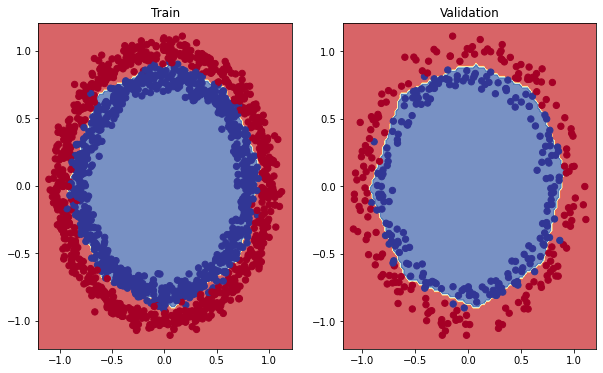

In [27]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_4, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_4, X_val, y_val)
plt.title("Validation")

plt.show()

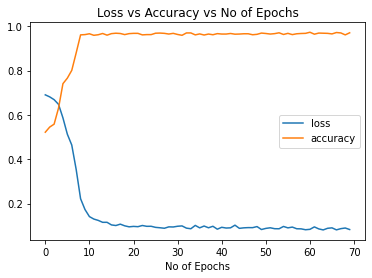

In [28]:
pd.DataFrame(history_4.history).plot()
plt.xlabel("No of Epochs")
plt.title("Loss vs Accuracy vs No of Epochs")
plt.show()

### Finding The Best Learning

* Using `learning rate callback`

In [29]:
from keras.api._v2.keras import callbacks
# Build
tf.random.set_seed(SEED)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation="relu", input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Use a learning rate callback
lr_scheduler = (
    tf.keras.callbacks
    .LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))
    )

# Fit 
history_5 = model_5.fit(X_train, y_train, epochs=70, callbacks=[lr_scheduler])

Epoch 1/70
50/50 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5069 - lr: 1.0000e-04
Epoch 2/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5069 - lr: 1.1220e-04
Epoch 3/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5219 - lr: 1.4125e-04
Epoch 5/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5144 - lr: 1.5849e-04
Epoch 6/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5156 - lr: 1.7783e-04
Epoch 7/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5144 - lr: 1.9953e-04
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6805 -

<Figure size 648x504 with 0 Axes>

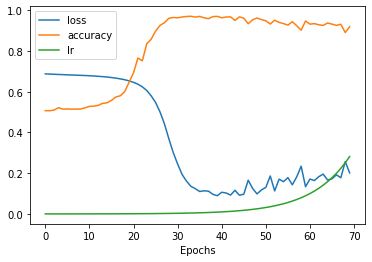

In [30]:
plt.figure(figsize=(9, 7))
pd.DataFrame(history_5.history).plot()
plt.xlabel("Epochs")
plt.show()

In [31]:
epochs = 70
learning_rates = 1e-4 * (10 ** (np.arange(epochs) / 20))
learning_rates

array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
      

In [32]:
# Slice the list
history_5.history.get("loss")[:4]

[0.6876365542411804,
 0.6866081357002258,
 0.6856697797775269,
 0.6847500801086426]

#### Plotting The Learning Rate Vs. Loss

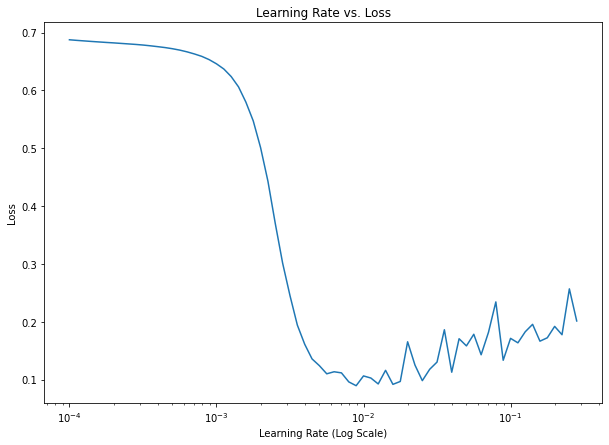

In [33]:
plt.figure(figsize=(10, 7))

# Make a plot with log scaling on the x axis
plt.semilogx(learning_rates, history_5.history.get("loss"))
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

In [34]:
# Comment:
# The ideal learning rate from the plot above is the point/region where the 
# loss is decreasing the most. i.e btween 1e-2 and 2e-2 (0.01 and 0.02)

### Rebuild The Model

In [35]:
# Build
tf.random.set_seed(SEED)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit
history_6 = model_6.fit(X_train, y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5431
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6062
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7319
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8356
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9444
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9538
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9556
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9575
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9625
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9638
Epoch 11/50
50/50 [

In [36]:
# Evaluate
loss, accuracy = model_6.evaluate(X_val, y_val)

13/13 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9450


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


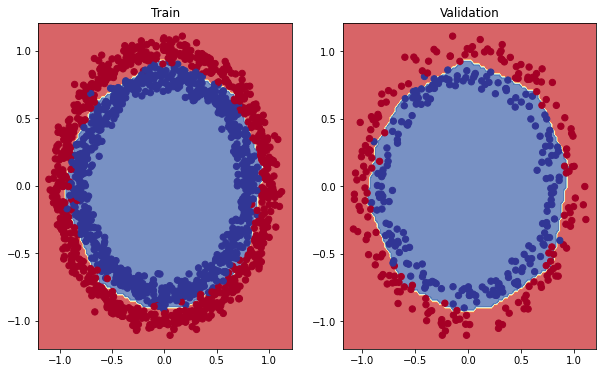

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_6, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_6, X_val, y_val)
plt.title("Validation")

plt.show()

### Other Classification Metrics


Source: [Google ML Crash Course](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

#### Recall (True Positive rate)

$$
Recall = \frac{True Positives}{(True Positives + False Negatives)}
$$

####  False Positive rate

$$
Recall = \frac{False Positives}{(False Positives + True Negatives)}
$$

#### Precision

$$
Precision = \frac{True Positives}{(True Positives + False Positives)}
$$


#### F1 Score

* Harmonic Mean

$$
F1_{score} = \frac{(2 * Precision * Recall)}{(Precision + Recall)}
$$


#### Specificity

$$
Specificity = \frac{True Negatives}{(True Negatives + False Positives)}
$$

#### Accuracy

$$
Accuracy = \frac{(True Positives + True Negatives)}{(True Negatives + False Positives + False Negatives + True Positives)}
$$


In [38]:
# Print the accuracy
print(f"Model Loss on validation data: {loss:.4f}\n")
print(f"Model Accuracy on validation data: {(accuracy * 100):.2f}%")

Model Loss on validation data: 0.1429

Model Accuracy on validation data: 94.50%


### Create Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

y_probs = model_6.predict(X_val)

# It outputs the probability
y_probs[:4]

13/13 [==============================] - 0s 1ms/step


array([[9.9984246e-01],
       [2.1043916e-04],
       [9.9684411e-01],
       [9.8095989e-01]], dtype=float32)

In [40]:
# Convert the probabilities to 0 or 1
y_pred = [int(np.round(x) )for x in y_probs]
y_pred[:4]

[1, 0, 1, 1]

In [41]:
def plot_confusion_matrix(*, y_true: np.ndarray, 
                          y_pred: np.ndarray, 
                          classes :Union[bool, List[str], None]=None,
                          figsize :Tuple=(12, 12))  -> "Plot":
  """This returns a confusion matrix plot.
  
  Params:
    y_true (np.ndarray): The ground truth. i.e the true values
    y_pred (np.ndarray): t=The predicted values.
    classes (Union[bool, List[str], None], default=None): The class label names.

  Returns:
    A Matplotlib Plot
  """
  PCT, SIZE = 100, 12
  WHITE, BLACK = "white", "black"
  
  # confusion matrix
  c_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
  # Normalize the values
  c_matrix_norm = np.divide(c_matrix.astype(float), c_matrix.sum(axis=1))
  n_classes = c_matrix.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Display an array as a matrix in a new figure window.
  mat = ax.matshow(c_matrix, cmap=plt.cm.Blues)
  # Add a color bar to the side of the plot
  fig.colorbar(mat)

  labels = classes if classes else np.arange(c_matrix.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix", xlabel="Predicted Label",
         ylabel="True Label", xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), xticklabels=labels, 
         yticklabels=labels)
  
  # Move the label to the bottom
  ax.xaxis.tick_bottom()

  # Adjust the font size
  ax.xaxis.label.set_size(SIZE)
  ax.yaxis.label.set_size(SIZE)
  ax.title.set_size(SIZE)

  # Set the threshold
  threshold = np.mean((c_matrix.max(), c_matrix.min()))

  # Add text
  # itertools.product: Cartesian product of input iterables. 
  # It's equivalent to nested for-loops.
  for i, j in itertools.product(range(c_matrix.shape[0]), 
                                range(c_matrix.shape[1])):
    plt.text(i, j, f"{c_matrix[i, j]} ({c_matrix_norm[i, j] * PCT:.2f}%)",
             horizontalalignment="center", 
             color=WHITE if c_matrix[i, j] > threshold else BLACK, 
             size=SIZE)

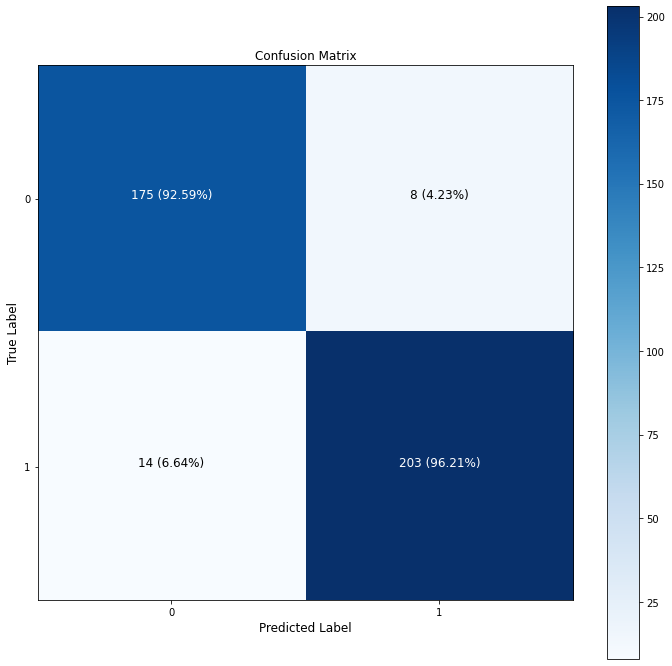

In [42]:
plot_confusion_matrix(y_true=y_val, y_pred=y_pred)

<hr><br>

## Multi-class Classification

* The class has more than two (2) unique labels.

In [43]:
# Load the dataset
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (validation_data, validation_labels) = (
    fashion_mnist.load_data()
    )

train_data.shape, validation_data.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [45]:
# Shape of the data
# Matrix (Rank 2) and a scaler (Rank 0)
train_data[0].shape, train_labels[0].shape

((28, 28), ())

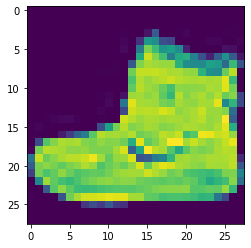

In [46]:
# Visualize the data
plt.imshow(train_data[0])
plt.show()

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

# Number of classes
len(class_names)

10

In [48]:
def visualize_mnist_data(*, data: np.ndarray, 
                         y_labels: np.ndarray, 
                         n_rows:int=2, 
                         n_cols:int=2) -> "Plot":
  """This returns a plot showing the Fashion MNIST data."""
  SIZE, FIGSIZE = 14, (10, 10)
  fig, axs = plt.subplots(n_rows, n_cols, figsize=FIGSIZE)
  indices = np.random.choice(a=data.shape[0], 
                             size=np.multiply(n_rows, n_cols))

  for idx, num in enumerate(indices):
    if n_rows > 1: # It's a 2-D array
          ax = axs[(idx // n_cols), (idx % n_cols)]
    else: # It's a list
        ax = axs[idx]
    ax.imshow(data[idx], cmap=plt.cm.binary)
    ax.set_title(f"{class_names[y_labels[num]]}", size=SIZE)

  fig.tight_layout()
  plt.show()
    

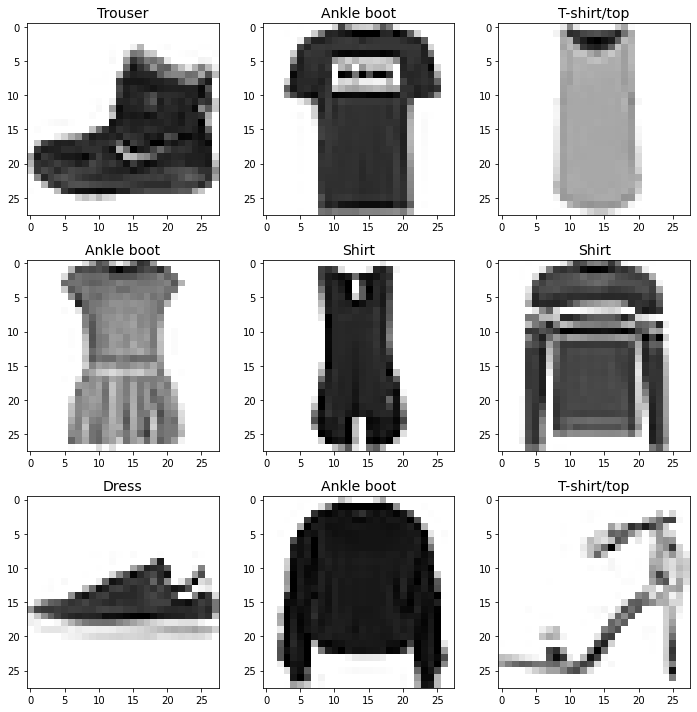

In [49]:
visualize_mnist_data(data=train_data, y_labels=train_labels, n_rows=3, n_cols=3)


### Build Multi-Class Model

> For multi-class classification the architecture is similar to binary class but we need to tweak a few things:
1. The `input shape`
2. The `loss function`: 
  * **Categorical Crossentropy**: This is used when the labels are **one-hot encoded**.
  * **Sparse Categorical Cross Entropy**: Used when there are two or more label classes and the labels are provided as **integers**. i.e **NOT** one-hot encoded.
3. The `Output Activation Function`:
  * **Softmax Activation Function**: The softmax function, also known as **softargmax**  or **normalized exponential function** and it converts a vector of `K real numbers` into a probability distribution of `K possible outcomes`. It is a generalization of the logistic function to multiple dimensions, and used in multinomial logistic regression. The softmax function is **often** used as the **last activation function** of a neural network to `normalize` the output of a network to a `probability distribution` over predicted output classes, based on Luce's choice axiom.

In [50]:
train_data.shape[-2:]

(28, 28)

In [51]:
# Flatten the input
input_tensor = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=train_data.shape[-2:])])
input_tensor.output_shape

(None, 784)

In [52]:
# Build model 

tf.random.set_seed(SEED)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data.shape[-2:]),  # Flatten the input
    tf.keras.layers.Dense(units=5, activation="relu"),                         
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax") # Output layer with 10 possible class labels
])

# Compile
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are NOT one-hot encoded
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 5)                 3925      
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Fit
epochs = 10
history_7 = model_7.fit(train_data, 
                        train_labels, 
                        epochs=epochs, 
                        validation_data=(validation_data, validation_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5145 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy:

### Build An Improved Model

* The model's performance is quite poor!
* This might be due to the fact that the data was not preprocessed. i.e normalized.

In [54]:
# Normalize the data!
# Subtract the minimum value from every element in the array and 
# divide by the range (maximum - minimum)

print(train_data.max(), train_data.min())

255 0


In [55]:
train_data_sc = np.divide(( train_data - train_data.min() ), ( train_data.max() - train_data.min()) )
train_data_sc

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [56]:
class Normalizer:
  """This is used to normalize the data."""

  def __init__(self) -> None:
    self.min = None
    self.max = None

  def __repr__(self) -> str:
    """This returns the string representation of the transformer."""
    return (
        f"{self.__class__.__name__}("
      f"min={self.min}, max={self.max})"
    )

  def fit(self, X: np.ndarray, y=None) -> None:
    """Learn the parameters."""
    self.min = np.min(X)
    self.max = np.max(X)
    return self

  def transform(self, X: np.ndarray, y=None) -> np.ndarray:
    """This is used to apply normalization to the data."""
    numerator = X - self.min 
    denominator = self.max - self.min
    return numerator / denominator

  def fit_transform(self, X: np.ndarray, y=None) -> np.ndarray:
    """This is used to learn the parameters and 
    apply normalization to the data."""
    self.fit(X, y)
    return self.transform(X, y)

In [57]:
normalizer = Normalizer()
train_data_scaled = normalizer.fit_transform(X=train_data)
validation_data_scaled = normalizer.transform(validation_data)

# Verify that the arrays are equal
np.array_equal(train_data_scaled, train_data_sc)

True

In [58]:
# Build model
tf.random.set_seed(SEED)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data_scaled.shape[-2:]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

# Compile
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # it requires one-hot encoding
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 5)                 3925      
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [59]:
# One-hot encode
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [60]:
# Fit (Remember to one-hot encode the labels)
history_8 = model_8.fit(train_data_scaled, 
            tf.one_hot(train_labels, depth=10),
            epochs=epochs,
            validation_data=(validation_data_scaled, tf.one_hot(validation_labels, 
                                                                depth=10)) 
            )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4695 - accuracy: 0.4230 - val_loss: 1.1634 - val_accuracy: 0.5303
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9281 - accuracy: 0.6280 - val_loss: 0.8500 - val_accuracy: 0.6598
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7385 - accuracy: 0.7262 - val_loss: 0.7270 - val_accuracy: 0.7502
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6595 - accuracy: 0.7672 - val_loss: 0.6904 - val_accuracy: 0.7594
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7793 - val_loss: 0.6437 - val_accuracy: 0.7755
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6039 - accuracy: 0.7851 - val_loss: 0.6331 - val_accuracy: 0.7762
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5896 - accuracy: 0.7884 - val_loss: 0.6264 - val_accuracy:

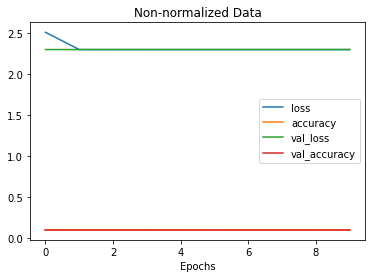

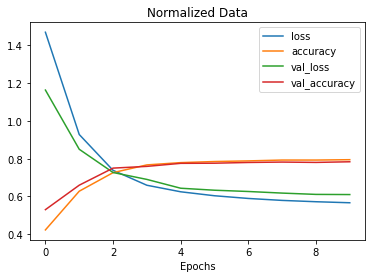

In [61]:
### Plot the loss curves
pd.DataFrame(history_7.history).plot()
plt.xlabel("Epochs")
plt.title("Non-normalized Data")

pd.DataFrame(history_8.history).plot()
plt.xlabel("Epochs")
plt.title("Normalized Data")

plt.show()

### Find The Ideal Learning Rate

* Using the learning rate callback

In [62]:
# Build
tf.random.set_seed(SEED)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data_scaled.shape[-2:]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="sigmoid")
])

# Compile
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Learning rate callback
lr_scheduler = (tf.keras.callbacks
                .LearningRateScheduler(schedule=lambda epochs: 1e-3 * 10 ** (epochs/20))
                )

# Fit
epochs = 30
history_9 = model_9.fit(train_data_scaled, 
            train_labels, epochs=epochs, 
            callbacks=[lr_scheduler], 
            validation_data=(validation_data_scaled, validation_labels)
            )

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8854 - accuracy: 0.6847 - val_loss: 0.6184 - val_accuracy: 0.7897 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5634 - accuracy: 0.8086 - val_loss: 0.5806 - val_accuracy: 0.8019 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5248 - accuracy: 0.8212 - val_loss: 0.5466 - val_accuracy: 0.8109 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5061 - accuracy: 0.8274 - val_loss: 0.5661 - val_accuracy: 0.8053 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4974 - accuracy: 0.8286 - val_loss: 0.5751 - val_accuracy: 0.7990 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4909 - accuracy: 0.8301 - val_loss: 0.5226 - val_accuracy: 0.8181 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 5s

In [63]:
learning_rates = 1e-3 * 10 ** (np.arange(epochs) / 20)
learning_rates

array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383])

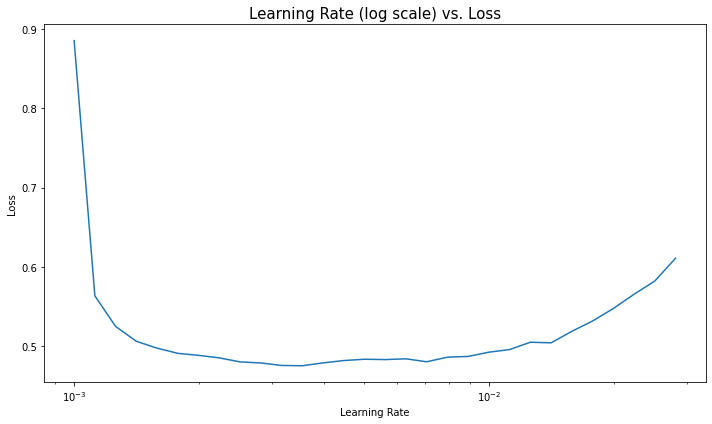

In [64]:
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, history_9.history.get("loss"))
# plt.plot(learning_rates, history_9.history.get("loss"))
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate (log scale) vs. Loss", size=15)
plt.tight_layout()
plt.show()

In [65]:
# 0.001 is the best learning rate

# Rebuild the model
tf.random.set_seed(SEED)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data_scaled.shape[-2:]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="sigmoid")
])

# Compile
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_9 = model_9.fit(train_data_scaled, 
            train_labels, 
            epochs=20, 
            validation_data=(validation_data_scaled, validation_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3031 - accuracy: 0.4836 - val_loss: 0.9213 - val_accuracy: 0.6415
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8275 - accuracy: 0.6705 - val_loss: 0.7982 - val_accuracy: 0.6731
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7504 - accuracy: 0.6951 - val_loss: 0.7493 - val_accuracy: 0.6965
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7138 - accuracy: 0.7092 - val_loss: 0.7259 - val_accuracy: 0.7072
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6706 - accuracy: 0.7524 - val_loss: 0.6716 - val_accuracy: 0.7690
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6118 - accuracy: 0.7911 - val_loss: 0.6262 - val_accuracy: 0.7860
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5826 - accuracy: 0.8000 - val_loss: 0.6063 - val_accuracy:

In [66]:
# Evaluation it's performance using confusion metrics
y_prob = model_9.predict(validation_data_scaled)

# Turn the probabilities into predictions
y_pred = np.argmax(y_prob, axis=1)
y_pred[:4]

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, 1])

In [67]:
y_prob.shape, class_names

((10000, 10),
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

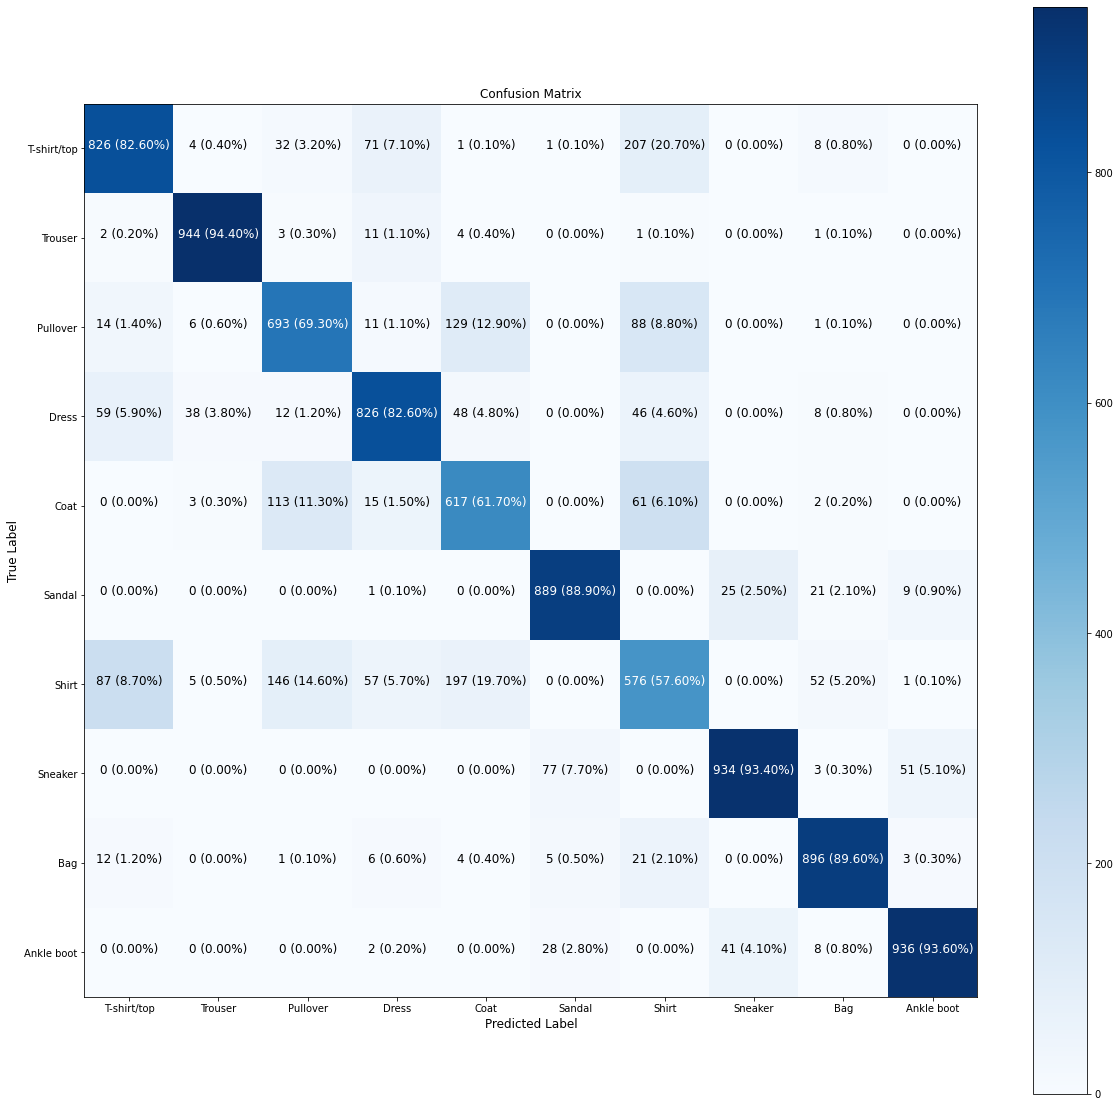

In [68]:
plot_confusion_matrix(y_true=validation_labels, y_pred=y_pred, 
                      classes=class_names, figsize=(20, 20))